
<img src="https://statusneo.com///wp-content/uploads/2020/01/2.png">

<h4><b>PROJECT :</b> Crypto Currency Analysis and Forecasting using Lstm and Facebook Prophet model</h4><br>

<h5><b>What is Crpyto Currency ?</b><h5>
 <p>  A cryptocurrency (or “crypto”) is a digital currency that can be used to buy goods and services, and uses an online ledger with strong cryptography to secure online transactions. Much of the interest in these unregulated currencies is to trade for profit, with speculators at times driving prices skyward. </p>    <br>
    <img src="https://miro.medium.com/max/1400/1*7tMIfJjBsJYQFJf4otPKwQ.png" height=400px width=600px>
    <p><b>Why use it ?</b><br>
 1.Has no intrinsic value.<br>
 2.Has no physical form.<br>
 3.Its supply is not determied by a central bank : Network is completly decentralized.<br>
</p>
 


In [1]:
#import all the neccesory libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from IPython.display import clear_output
import random
import time
import os
#below is the list of input that we will be using 
print(os.listdir("Input"))

['bitcoin_price.csv', 'coin_Aave.csv', 'coin_BinanceCoin.csv', 'coin_Cardano.csv', 'coin_ChainLink.csv', 'coin_Cosmos.csv', 'coin_CryptocomCoin.csv', 'coin_EOS.csv', 'coin_Iota.csv', 'coin_Monero.csv', 'coin_NEM.csv', 'coin_Polkadot.csv', 'coin_Solana.csv', 'coin_Stellar.csv', 'coin_Tether.csv', 'coin_Tron.csv', 'coin_Uniswap.csv', 'coin_USDCoin.csv', 'coin_WrappedBitcoin.csv', 'coin_XRP.csv', 'ethereum_price.csv', 'litecoin_price.csv', 'ripple_price.csv']


<h3><b>Dataset Used For Analysis and Forecasting  :-</b></h3><br>
<a href="https://finance.yahoo.com/cryptocurrencies/">1.Yahoo Finance Historical Dataset </a><br><br>
<h5><a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory">2.Crptocurrency Historical prices From kaggle </a><h5>

In [2]:
#importing all the files and making a dataframe using first four letter of its filename
csv_list = os.listdir("input")
data_list = [x[:-4] for x in csv_list]
data_str_list = data_list.copy()
for i in range(0,len(csv_list)):
    temp = "input/" + csv_list[i]
    data_list[i] = pd.read_csv(temp)
#datalist iis out master datafarme

In [3]:
def printer(string):
    for i in range(0,len(data_list)):
        print(i)
        if data_str_list[i].count(string) > 0:
            print(data_str_list[i],"\n",data_list[i].columns,"\n")


In [4]:
data_list[0].columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [5]:
price_comp_list = pd.concat(data_list,ignore_index=True)
price_comp_list.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [6]:
price_comp_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34115 entries, 0 to 34114
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        34115 non-null  int64  
 1   Name       34115 non-null  object 
 2   Symbol     34115 non-null  object 
 3   Date       34115 non-null  object 
 4   High       34115 non-null  float64
 5   Low        34115 non-null  float64
 6   Open       34115 non-null  float64
 7   Close      34115 non-null  float64
 8   Volume     34115 non-null  float64
 9   Marketcap  34115 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.6+ MB


<h3>Explaining the column Name</h3>
<p><b>Date</b> : date of observation<br>
<b>Open </b>: Opening price on the given day<br>
<b>High </b>: Highest price on the given day<br>
<b>Low </b>: Lowest price on the given day<br>
<b>Close </b>: Closing price on the given day<br>
<b>Volume </b>: Volume of transactions on the given day<br>
<b>Market Cap </b>: Market capitalization in USD</p>

In [7]:
pd.options.display.float_format = '{:,.2f}'.format
MeanValues = price_comp_list.groupby("Name").mean()
!!

[]

<h3>Understanding Correlation :-</h3>
<p>Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate 
 <img src="https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png">
</p>
<br><h3>Now lets find out Correlation among 4 Crypto Currency :-</h3>
    <p>1.Bitcoin<br>
        2.Ethereum<br>
        3.Ripple<br>
        4.litecoin<br>
    </p>
    <p> * we are using Date and Closing price to figure out the Correlation</p>

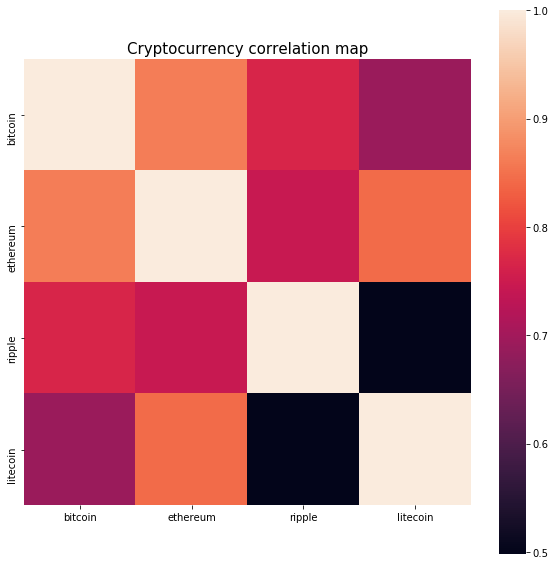

In [8]:
#we we will plot a heat map that is going to show correlation b/w top 4 crypto currency
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
files_to_use = ["bitcoin_price.csv", "ethereum_price.csv", "ripple_price.csv", "litecoin_price.csv"]

cols_to_use = []
for ind, file_name in enumerate(files_to_use):
    currency_name = file_name.split("_")[0]
    if ind == 0:
        df = pd.read_csv("input/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        df.columns = ["Date", currency_name]
    else:
        temp_df = pd.read_csv("input/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        temp_df.columns = ["Date", currency_name]
        df = pd.merge(df, temp_df, on="Date")
    cols_to_use.append(currency_name)
df.head()
        
temp_df = df[cols_to_use]
corrmat = temp_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Cryptocurrency correlation map", fontsize=15)
plt.show()

In [9]:
#then we use plotly to plot a graph on closing price showing a comparision between top crypto currency
def MarketCapGraph(currencyList):
    gf = price_comp_list.groupby('Name')
    data = []

    for currency in currencyList[::-1]:
        group = gf.get_group(currency)
        dates = group['Date'].tolist()
        date_count = len(dates)
        marketCap = group['Marketcap'].tolist()
        zeros = [0] * date_count

        data.append(dict(
            type='scatter3d',
            mode='lines',
            x=dates + dates[::-1] + [dates[0]],  # year loop: in incr. order then in decr. order then years[0]
            y=[currency] * date_count,
            z=marketCap + zeros + [marketCap[0]],
            name=currency,
            line=dict(
                width=4
            ),
        ))

    layout = dict(
        title='Cryptocurrencies Market Capitalizations',
        scene=dict(
            xaxis=dict(title='Dates'),
            yaxis=dict(title='Cryptocurrencies'),
            zaxis=dict(title='Market Capitalizations'),
            camera=dict(
                eye=dict(x=-1.7, y=-1.7, z=0.5)
            )
        )
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)

In [10]:
MarketCapGraph(MeanValues.sort_values(by=['Marketcap'],ascending=False).head(5).index)

<h3> Forecasting Closing Prices Using Bi-Directional LSTM </h3>

In [4]:
#first of all lets choose bit coin as source of prediction as it is the most popular and most used 
import pandas as pd
df_bitcoin=pd.read_csv('input/bitcoin_price.csv')

In [5]:
df_bitcoin
df_bitcoin.drop('SNo',axis=1,inplace=True)

In [6]:
df_bitcoin.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03
mean,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10
std,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09
50%,1197.334961,1164.174988,1180.100037,1182.809998,3.301950e+08,1.924238e+10
75%,8138.046589,7703.357500,7924.612338,7926.696939,1.296743e+10,1.387658e+11
max,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12


In [22]:
df_bitcoin['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df_bitcoin.columns

Index(['Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE656BEB88>,
      dtype=object)

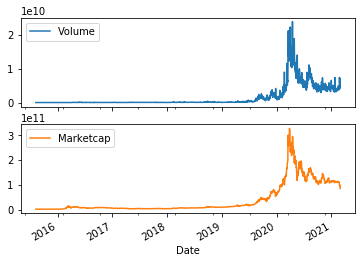

In [24]:
#lets see a effect of years on volume and marketcap of bitcoin 
df_bitcoin.set_index('Date')[['Volume','Marketcap']].plot(subplots=True)

In [83]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8


In [84]:
df = pd.read_csv('BTC-USD (1).csv')



In [85]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-12,266.145996,272.203003,265.200012,267.795990,267.795990,18880300.0
1,2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904.0
2,2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704.0
3,2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504.0
4,2015-01-16,209.070007,221.591003,199.770996,208.097000,208.097000,38421000.0


In [86]:
df.shape

(2283, 7)

Text(0, 0.5, 'Close Price (USD)')

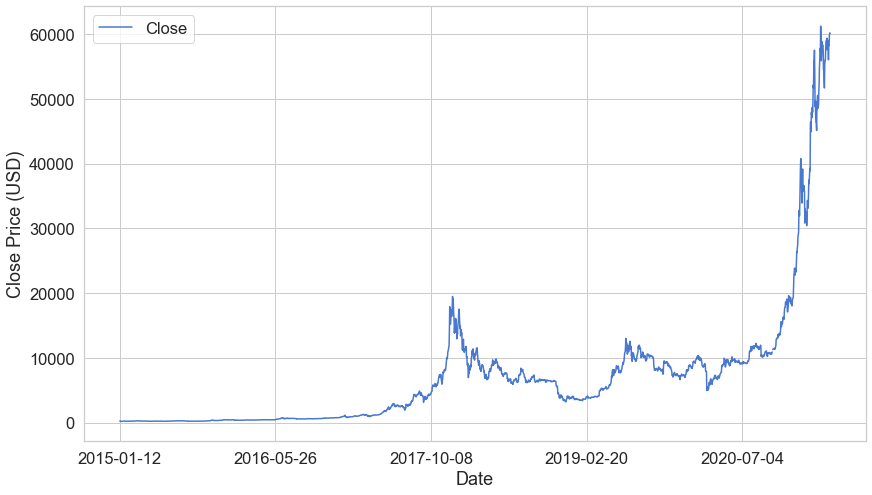

In [87]:
#now lets see the closing price of bitcoin for each year
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

<h3>Scaling Values using MinMax Scaler <h3>

In [88]:
#feature scaling 
#firstly lets normalize the dataset for that we are using minmax scaler
#rescaling the range of features to scale the range in [0, 1] or [−1, 1].
scaler = Min!!

close_price = df.Close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [89]:
scaled_close.shape

(2283, 1)

In [90]:
np.isnan(scaled_close).any()

True

In [91]:
scaled_close = scaled_close[~np.isnan(scaled_close)]

In [92]:
scaled_close = scaled_close.reshape(-1, 1)

In [93]:
np.isnan(scaled_close).any()
#feeding data to lstm can be tricky for that we are using windowing lets see what it is 

False

<h3>Preparing the data for BI-Direction LSTM model </h3>
<img 
src="https://raw.githubusercontent.com/AdarshKandwal/StatusNeoProject1/main/Datascience/CryptoCurrnecy%20Analysis/Images/image2.png" height=400 px width= 400 px>
<img 
src="https://raw.githubusercontent.com/AdarshKandwal/StatusNeoProject1/main/Datascience/CryptoCurrnecy%20Analysis/Images/image3.png" height=400 px width= 400 px>
<img 
src="https://raw.githubusercontent.com/AdarshKandwal/StatusNeoProject1/main/Datascience/CryptoCurrnecy%20Analysis/Images/image4.png" height=400 px width= 400 px>
**we will try to predict 100 days in future 


In [106]:
#we are going to take a seq len of 100 days and predict 100 days in future 
SEQ_LEN = 100!!

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [107]:
X_train.shape

(2070, 99, 1)

In [108]:
X_test.shape

(109, 99, 1)

<h3>LSTM (Long Short-Term Memory) </h3>
<p>Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problem<br>
LSTM has a chain structure that contains four neural networks and different memory blocks called cells.</p>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/newContent1.png" height=400 px width=400 px>

In [115]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1


import tensorflow as tf
from tensorflow import keras
model=tf.keras.Sequential([
    tf.keras.layers.LSTM(128,input_shape=(WINDOW_SIZE, X_train.shape[-1]),return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64,return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='linear')
]
)

'''
import tensorflow as tf
from tensorflow import keras
model=tf.keras.Sequential([
    tf.keras.layers.LSTM(128,input_shape=(WINDOW_SIZE, X_train.shape[-1]),return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64,return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='linear')
]
)
'''



"\nimport tensorflow as tf\nfrom tensorflow import keras\nmodel=tf.keras.Sequential([\n    tf.keras.layers.LSTM(128,input_shape=(WINDOW_SIZE, X_train.shape[-1]),return_sequences=True),\n    tf.keras.layers.LeakyReLU(alpha=0.5),\n    tf.keras.layers.LSTM(128,return_sequences=True),\n    tf.keras.layers.LeakyReLU(alpha=0.5),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.LSTM(64,return_sequences=False),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(1,activation='linear')\n]\n)\n"

In [116]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [117]:
BATCH_SIZE = 64

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
30/30 [==============================] - 22s 492ms/step - loss: 0.0015 - val_loss: 0.0075
Epoch 2/50
30/30 [==============================] - 12s 391ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 3/50
30/30 [==============================] - 12s 403ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 4/50
30/30 [==============================] - 12s 410ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 5/50
30/30 [==============================] - 12s 411ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 6/50
30/30 [==============================] - 12s 415ms/step - loss: 4.3863e-04 - val_loss: 8.9626e-04
Epoch 7/50
30/30 [==============================] - 13s 425ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 8/50
30/30 [==============================] - 13s 437ms/step - loss: 3.4017e-04 - val_loss: 0.0019
Epoch 9/50
30/30 [==============================] - 13s 433ms/step - loss: 3.3458e-04 - val_loss: 0.0025
Epoch 10/50
30/30 [==============================] - 13s 439ms/step - loss:

# model.evaluate(X_test, y_test)

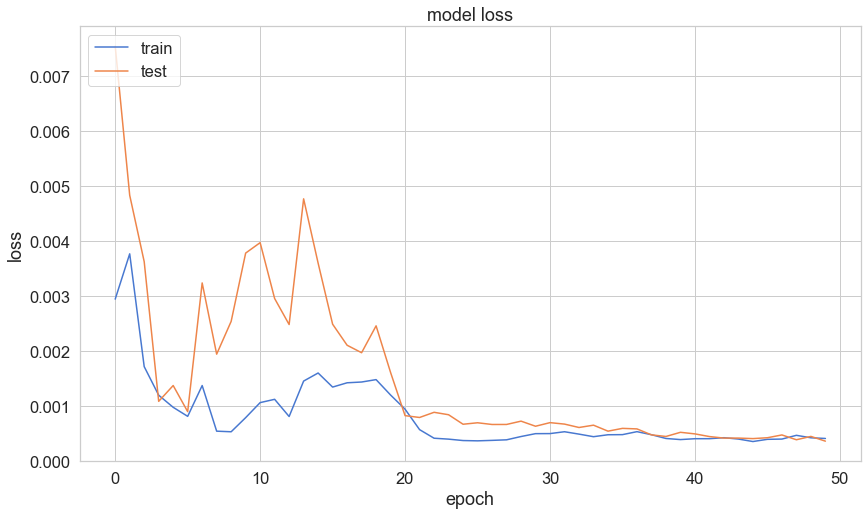

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

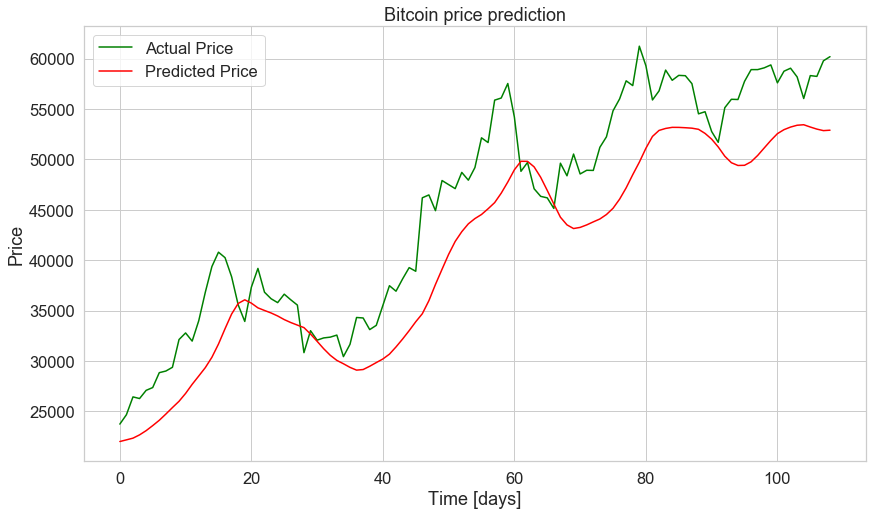

In [120]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

<h3>Forecasting usign Facebook Prophet</h3><br>
<p>Facebook developed an open sourcing Prophet, a forecasting tool that is available in both Python and R.
It is really fast as it is built in Stan, a programming language for statistical inference that is written in C++.It is a additive regression model where non-linear trends are fit with weekly , yearly and daily seasonality and it also takes in consideration the holiday effects.<br><br>
1. It uses piecewise linear or logistic growth curve trend and Prophet automatically detects changes in trends by selecting change points from the given data.<br>
2. Weekly seasonal change is measured using a Dummy variable.<br>
3. Seasonal Component is measured using Fourier series.<br><br>
The model uses a decomposable time series model with three major model components i.e. Trend, Seasonality, and holidays. <br>
y(t)= g(t) + s(t) + h(t) + εt<br>
•	g(t) :piecewise linear regression /growth curve for non-periodic changes in time series.<br>
•	s(t): periodic changes (e.g. weekly/yearly seasonality)<br>
•	h(t): effects of holiday (user provided)]<br>
•	εt: error term account<br>


<p>



In [33]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df=pd.read_csv('BTC-USD (1).csv')

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-12,266.15,272.20,265.20,267.80,267.80,"18,880,300.00"
1,2015-01-13,267.39,268.28,219.91,225.86,225.86,"72,843,904.00"
2,2015-01-14,223.89,223.89,171.51,178.10,178.10,"97,638,704.00"
3,2015-01-15,176.90,229.07,176.90,209.84,209.84,"81,773,504.00"
4,2015-01-16,209.07,221.59,199.77,208.10,208.10,"38,421,000.00"


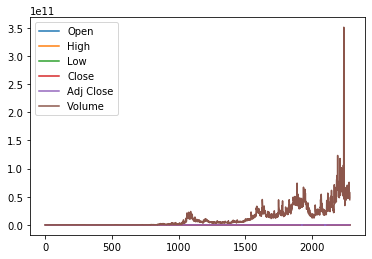

In [36]:
df.plot()

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
from fbprophet import Prophet

In [40]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [41]:
# Initialize the Model
model=Prophet()

In [42]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [43]:
df.dropna(axis=0,inplace=True)

In [44]:
df=df[['Date','Close']]

df.columns = ['ds','y']
df.head()

,ds,y
0,2015-01-12,267.80
1,2015-01-13,225.86
2,2015-01-14,178.10
3,2015-01-15,209.84
4,2015-01-16,208.10


In [45]:
df.tail()

,ds,y
2278,2021-04-08,"58,323.95"
2279,2021-04-09,"58,245.00"
2280,2021-04-10,"59,793.23"
2281,2021-04-11,"60,204.96"
2282,2021-04-12,"60,174.77"


In [46]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [60]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=300)

In [61]:
future_dates.tail()

,ds
2574,2022-02-02
2575,2022-02-03
2576,2022-02-04
2577,2022-02-05
2578,2022-02-06


In [62]:
prediction=model.predict(future_dates)

In [63]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-12,-818.76,"-3,380.96","6,861.28",-818.76,-818.76,"2,473.52","2,473.52","2,473.52",47.70,47.70,47.70,"2,425.81","2,425.81","2,425.81",0.00,0.00,0.00,"1,654.76"
1,2015-01-13,-814.00,"-3,825.65","7,391.74",-814.00,-814.00,"2,339.91","2,339.91","2,339.91",-28.23,-28.23,-28.23,"2,368.14","2,368.14","2,368.14",0.00,0.00,0.00,"1,525.91"
2,2015-01-14,-809.25,"-4,030.19","6,237.92",-809.25,-809.25,"2,266.69","2,266.69","2,266.69",-30.88,-30.88,-30.88,"2,297.57","2,297.57","2,297.57",0.00,0.00,0.00,"1,457.45"
3,2015-01-15,-804.49,"-3,717.93","6,859.43",-804.49,-804.49,"2,169.97","2,169.97","2,169.97",-45.62,-45.62,-45.62,"2,215.59","2,215.59","2,215.59",0.00,0.00,0.00,"1,365.48"
4,2015-01-16,-799.73,"-3,836.99","6,944.31",-799.73,-799.73,"2,158.83","2,158.83","2,158.83",34.88,34.88,34.88,"2,123.95","2,123.95","2,123.95",0.00,0.00,0.00,"1,359.09"


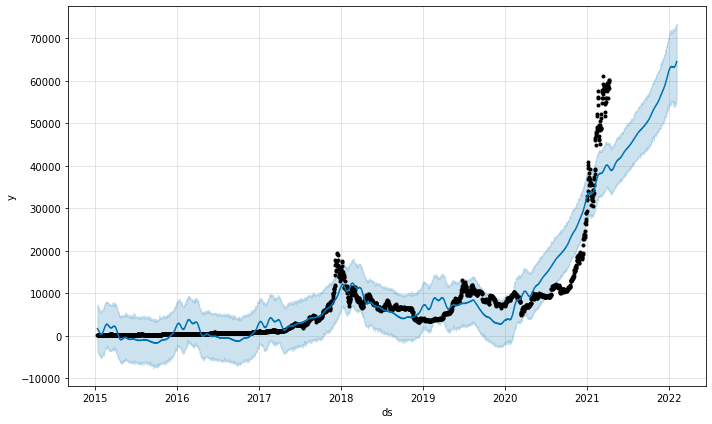

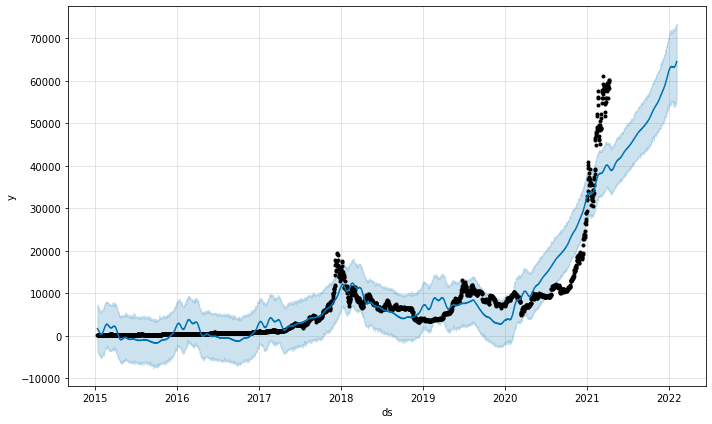

In [64]:
### plot the predicted projection
model.plot(prediction)

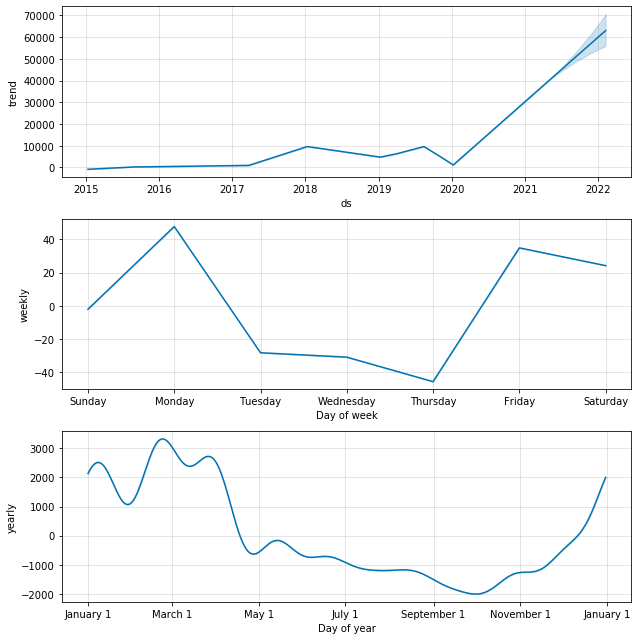

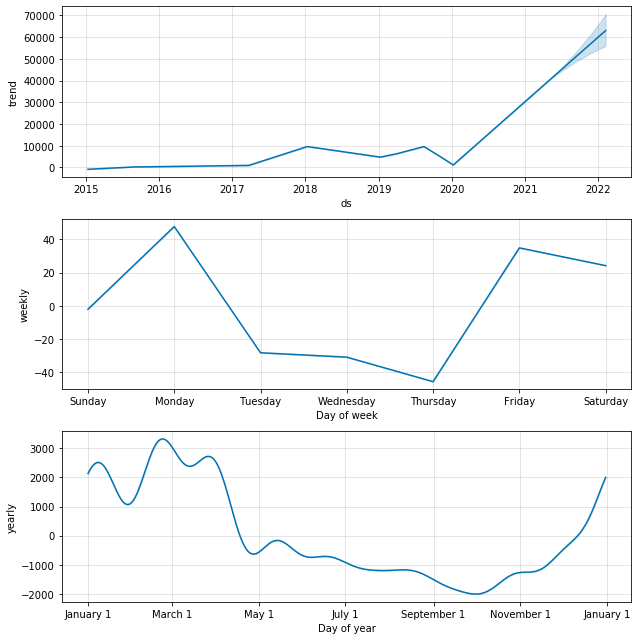

In [65]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)